## This notebook assumes you have the following packages installed in your conda environment.

In [1]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [5]:
handshapeImages = pd.read_csv('../data/HandshapeImages.csv')
for index,imageURL in enumerate(handshapeImages['HandshapeImage']):
    newURL = imageURL[:5] + "width=\"100\" height=\"100\" " + imageURL[5:]
    handshapeImages.loc[index,'HandshapeImage'] = newURL
handshapeImages.shape

(2723, 5)

In [5]:
handImages = handshapeImages['HandshapeImage']

In [6]:
df_default = df_default.join(handImages)

In [7]:
df_default

,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankEnglishTranslations,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,HandshapeImage
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,"bill, cash, dollar, money",1_DOLLAR,1268.0,NaN,NaN,NaN,NaN,383,None,"<img width=""100"" height=""100"" src=""https://asl..."
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,"dollar, five dollars, money",5_DOLLAR,2436.0,NaN,NaN,NaN,NaN,190,Number,"<img width=""100"" height=""100"" src=""https://asl..."
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,"eight hours, 8 hours, hour, time",NUMBER-HOURS,2437.0,NaN,NaN,NaN,NaN,129,Number,"<img width=""100"" height=""100"" src=""https://asl..."
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,2857.0,NaN,NaN,NaN,NaN,48,None,"<img width=""100"" height=""100"" src=""https://asl..."
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,"<img width=""100"" height=""100"" src=""https://asl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,D,3.0,36.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345983725,3.039,...,"0, none, number, zero, zilch",ZERO,1478.0,NaN,NaN,NaN,NaN,482,Number,"<img width=""100"" height=""100"" src=""https://asl..."
2719,zipper,zipper,D_01_034,D,1.0,34.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345804301,2.161,...,"coat, jacket, zipper",ZIPPER,94.0,29.0,28.0,NaN,NaN,165,None,"<img width=""100"" height=""100"" src=""https://asl..."
2720,zoo,zoo,E_03_042,E,3.0,42.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346067693,2.843,...,NaN,NaN,NaN,39.0,28.0,NaN,NaN,137,NaN,"<img width=""100"" height=""100"" src=""https://asl..."
2721,zoom_in,zoom_in,B_02_056,B,2.0,56.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555455,NaN,...,"computer screen, enlarge, expand, make bigger,...",ZOOM-IN,3114.0,NaN,NaN,NaN,NaN,524,Event,"<img width=""100"" height=""100"" src=""https://asl..."


In [8]:
df_default = pd.read_csv('../data/signdata_updated11-18.csv', encoding='latin-1')
df_default.shape
df_old = pd.read_csv('../data/signdata-11-5-20.csv')
df_old_subset = df_old[['Code','YouTube Video', 'VimeoVideo', 'VimeoVideoHTML']].copy()
df_default = df_default.merge(df_old_subset, on='Code', how='left')
df_default.head()

,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankLemmaID,SignBankSemanticField,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,TREE,None,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,NIGHT,None,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,HAMBURGER,None,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,NEPHEW,People,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,CASTLE,None,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...


In [6]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo', 'Phonological Complexity']]

In [7]:
df_subset.to_csv('signdata_with_urls.csv')

In [8]:
len(df_default["Code"].values)

2723

## Community Analysis

In [9]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [162]:
edges_df.shape

(13556, 6)

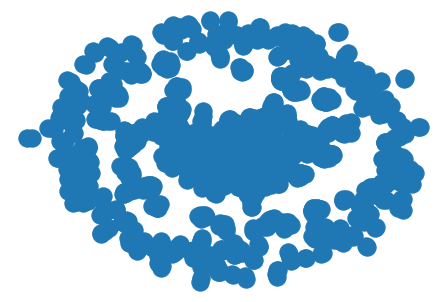

In [10]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [11]:
#first compute the best partition
# from community import greedy_modularity_communities
import community

G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

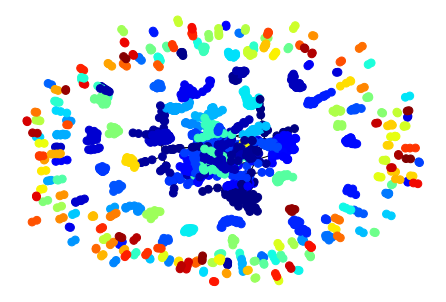

In [12]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [13]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [14]:
len(partition)

2068

In [15]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

2068


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,G_01_038,1
4,J_03_046,0


In [16]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

2068
(13556, 6)
(13556, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [17]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
df_merged.head(20)

(2723, 189)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankSemanticField,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,group_id
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,None,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,0.0
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,None,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,2.0
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,None,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,3.0
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,People,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,NaN
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,None,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,4.0
5,humble,humble,A_01_009,A,1,9,2.700,3.200,1.031,-0.418,...,Attribute,2940.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216431,<iframe src=https://player.vimeo.com/video/344...,5.0
6,cup,cup,A_01_010,A,1,10,3.421,5.742,1.413,0.909,...,None,388.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216455,<iframe src=https://player.vimeo.com/video/344...,6.0
7,english,english,A_01_011,A,1,11,3.577,4.645,1.496,0.326,...,None,1311.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216483,<iframe src=https://player.vimeo.com/video/344...,NaN
8,eyeglasses,eyeglasses,A_01_012,A,1,12,1.544,3.905,1.221,0.329,...,None,468.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216509,<iframe src=https://player.vimeo.com/video/344...,NaN
9,tie,tie,A_01_013,A,1,13,3.355,2.143,1.195,-0.751,...,None,3143.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216543,<iframe src=https://player.vimeo.com/video/344...,7.0


In [18]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0          0.0
1          2.0
2          3.0
3       1000.0
4          4.0
         ...  
2718    1000.0
2719     141.0
2720    1000.0
2721       3.0
2722      92.0
Name: group_id, Length: 2723, dtype: float64


array([   0.,    2.,    3., 1000.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,    1.,
         17.,   18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,
         26.,   27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,
         35.,   36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,
         44.,   45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,
         53.,   54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,
        107.,  108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,
        116.,  117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,
        125.,  126.,

In [19]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 0.0, 'color_code': '#a7e6a8'},
 {'group_id': 2.0, 'color_code': '#1d7cf0'},
 {'group_id': 3.0, 'color_code': '#4a8202'},
 {'group_id': 1000, 'color_code': '#1da4a5'},
 {'group_id': 4.0, 'color_code': '#561fa8'},
 {'group_id': 5.0, 'color_code': '#e3d27e'},
 {'group_id': 6.0, 'color_code': '#bce7d7'},
 {'group_id': 7.0, 'color_code': '#6d00a8'},
 {'group_id': 8.0, 'color_code': '#fdad5d'},
 {'group_id': 9.0, 'color_code': '#139fe6'},
 {'group_id': 10.0, 'color_code': '#a73fc5'},
 {'group_id': 11.0, 'color_code': '#04b60e'},
 {'group_id': 12.0, 'color_code': '#4b0b93'},
 {'group_id': 13.0, 'color_code': '#98d486'},
 {'group_id': 14.0, 'color_code': '#fee5af'},
 {'group_id': 15.0, 'color_code': '#cf15cb'},
 {'group_id': 16.0, 'color_code': '#3bfc05'},
 {'group_id': 1.0, 'color_code': '#9c2b05'},
 {'group_id': 17.0, 'color_code': '#50c05e'},
 {'group_id': 18.0, 'color_code': '#9b184f'},
 {'group_id': 19.0, 'color_code': '#2d3d3e'},
 {'group_id': 20.0, 'color_code': '#0fcfa4'}

In [20]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#a7e6a8">Sample</span>.

<br><span style="color:#1d7cf0">Sample</span>.

<br><span style="color:#4a8202">Sample</span>.

<br><span style="color:#1da4a5">Sample</span>.

<br><span style="color:#561fa8">Sample</span>.

<br><span style="color:#e3d27e">Sample</span>.

<br><span style="color:#bce7d7">Sample</span>.

<br><span style="color:#6d00a8">Sample</span>.

<br><span style="color:#fdad5d">Sample</span>.

<br><span style="color:#139fe6">Sample</span>.

<br><span style="color:#a73fc5">Sample</span>.

<br><span style="color:#04b60e">Sample</span>.

<br><span style="color:#4b0b93">Sample</span>.

<br><span style="color:#98d486">Sample</span>.

<br><span style="color:#fee5af">Sample</span>.

<br><span style="color:#cf15cb">Sample</span>.

<br><span style="color:#3bfc05">Sample</span>.

<br><span style="color:#9c2b05">Sample</span>.

<br><span style="color:#50c05e">Sample</span>.

<br><span style="color:#9b184f">Sample</span>.

<br><span style="color:#2d3d3e">Sample</span>.

<br><span style="color:#0fcfa4">Sample</span>.

<br><span style="color:#4b40a0">Sample</span>.

<br><span style="color:#09b1db">Sample</span>.

<br><span style="color:#cd9d3b">Sample</span>.

<br><span style="color:#d5177a">Sample</span>.

<br><span style="color:#2cf2b0">Sample</span>.

<br><span style="color:#ccd2dd">Sample</span>.

<br><span style="color:#2d049c">Sample</span>.

<br><span style="color:#262014">Sample</span>.

<br><span style="color:#89f02e">Sample</span>.

<br><span style="color:#5ba4e6">Sample</span>.

<br><span style="color:#9ab37c">Sample</span>.

<br><span style="color:#621f24">Sample</span>.

<br><span style="color:#f32720">Sample</span>.

<br><span style="color:#555b61">Sample</span>.

<br><span style="color:#be90f8">Sample</span>.

<br><span style="color:#af3880">Sample</span>.

<br><span style="color:#59f2dd">Sample</span>.

<br><span style="color:#784a30">Sample</span>.

<br><span style="color:#100150">Sample</span>.

<br><span style="color:#30230a">Sample</span>.

<br><span style="color:#47bf5e">Sample</span>.

<br><span style="color:#39c2c8">Sample</span>.

<br><span style="color:#a9aa66">Sample</span>.

<br><span style="color:#c966da">Sample</span>.

<br><span style="color:#195a1e">Sample</span>.

<br><span style="color:#6f71ed">Sample</span>.

<br><span style="color:#1a27fc">Sample</span>.

<br><span style="color:#f64b11">Sample</span>.

<br><span style="color:#a50556">Sample</span>.

<br><span style="color:#36601d">Sample</span>.

<br><span style="color:#55ec5d">Sample</span>.

<br><span style="color:#7a72d6">Sample</span>.

<br><span style="color:#adc460">Sample</span>.

<br><span style="color:#d94d77">Sample</span>.

<br><span style="color:#ad0b80">Sample</span>.

<br><span style="color:#260993">Sample</span>.

<br><span style="color:#d4ddf8">Sample</span>.

<br><span style="color:#7baa2a">Sample</span>.

<br><span style="color:#49be14">Sample</span>.

<br><span style="color:#ff4e20">Sample</span>.

<br><span style="color:#188f1b">Sample</span>.

<br><span style="color:#a21698">Sample</span>.

<br><span style="color:#d499b1">Sample</span>.

<br><span style="color:#57c414">Sample</span>.

<br><span style="color:#b7350c">Sample</span>.

<br><span style="color:#35bf95">Sample</span>.

<br><span style="color:#7f41fe">Sample</span>.

<br><span style="color:#9c5ad0">Sample</span>.

<br><span style="color:#795c01">Sample</span>.

<br><span style="color:#bddeee">Sample</span>.

<br><span style="color:#ed136a">Sample</span>.

<br><span style="color:#c7b006">Sample</span>.

<br><span style="color:#4595fc">Sample</span>.

<br><span style="color:#f7bf20">Sample</span>.

<br><span style="color:#9860b1">Sample</span>.

<br><span style="color:#3c7b65">Sample</span>.

<br><span style="color:#642f58">Sample</span>.

<br><span style="color:#3b1fd9">Sample</span>.

<br><span style="color:#091712">Sample</span>.

<br><span style="color:#684a2d">Sample</span>.

<br><span style="color:#026480">Sample</span>.

<br><span style="color:#74f5ce">Sample</span>.

<br><span style="color:#f0353f">Sample</span>.

<br><span style="color:#21a8a7">Sample</span>.

<br><span style="color:#266ea7">Sample</span>.

<br><span style="color:#a9c3b9">Sample</span>.

<br><span style="color:#18cf13">Sample</span>.

<br><span style="color:#838d9b">Sample</span>.

<br><span style="color:#fe50ac">Sample</span>.

<br><span style="color:#6fb36c">Sample</span>.

<br><span style="color:#9334f6">Sample</span>.

<br><span style="color:#832948">Sample</span>.

<br><span style="color:#a2f77d">Sample</span>.

<br><span style="color:#8bbbd7">Sample</span>.

<br><span style="color:#eccb7f">Sample</span>.

<br><span style="color:#4549c1">Sample</span>.

<br><span style="color:#bcf708">Sample</span>.

<br><span style="color:#a4c823">Sample</span>.

<br><span style="color:#ceed86">Sample</span>.

<br><span style="color:#a366b3">Sample</span>.

<br><span style="color:#0cdef9">Sample</span>.

<br><span style="color:#1ae638">Sample</span>.

<br><span style="color:#447e37">Sample</span>.

<br><span style="color:#549352">Sample</span>.

<br><span style="color:#976c08">Sample</span>.

<br><span style="color:#191482">Sample</span>.

<br><span style="color:#a0ba0f">Sample</span>.

<br><span style="color:#8a5323">Sample</span>.

<br><span style="color:#a21957">Sample</span>.

<br><span style="color:#eb5d5f">Sample</span>.

<br><span style="color:#726bb4">Sample</span>.

<br><span style="color:#bcbaf9">Sample</span>.

<br><span style="color:#17494b">Sample</span>.

<br><span style="color:#9108fd">Sample</span>.

<br><span style="color:#387ebe">Sample</span>.

<br><span style="color:#ae14ec">Sample</span>.

<br><span style="color:#ec3046">Sample</span>.

<br><span style="color:#8ebef0">Sample</span>.

<br><span style="color:#89bf99">Sample</span>.

<br><span style="color:#b5b0ea">Sample</span>.

<br><span style="color:#60b22a">Sample</span>.

<br><span style="color:#5f6982">Sample</span>.

<br><span style="color:#f512db">Sample</span>.

<br><span style="color:#ee5881">Sample</span>.

<br><span style="color:#f02813">Sample</span>.

<br><span style="color:#9ab5dd">Sample</span>.

<br><span style="color:#e8b09e">Sample</span>.

<br><span style="color:#e50d9c">Sample</span>.

<br><span style="color:#27bf7e">Sample</span>.

<br><span style="color:#76d481">Sample</span>.

<br><span style="color:#8e6bb6">Sample</span>.

<br><span style="color:#4bf262">Sample</span>.

<br><span style="color:#abeb15">Sample</span>.

<br><span style="color:#96a7a3">Sample</span>.

<br><span style="color:#822107">Sample</span>.

<br><span style="color:#646251">Sample</span>.

<br><span style="color:#1df8c7">Sample</span>.

<br><span style="color:#e1e1ad">Sample</span>.

<br><span style="color:#9ba3e5">Sample</span>.

<br><span style="color:#343948">Sample</span>.

<br><span style="color:#38d850">Sample</span>.

<br><span style="color:#139f53">Sample</span>.

<br><span style="color:#438b72">Sample</span>.

<br><span style="color:#5ee544">Sample</span>.

<br><span style="color:#fe9364">Sample</span>.

<br><span style="color:#e55d4d">Sample</span>.

<br><span style="color:#c9d046">Sample</span>.

<br><span style="color:#d204f2">Sample</span>.

<br><span style="color:#dea0a8">Sample</span>.

<br><span style="color:#6ff9fc">Sample</span>.

<br><span style="color:#ebeb5f">Sample</span>.

<br><span style="color:#6675a4">Sample</span>.

<br><span style="color:#192e7d">Sample</span>.

<br><span style="color:#bdf440">Sample</span>.

<br><span style="color:#ab22c5">Sample</span>.

<br><span style="color:#bc9df3">Sample</span>.

<br><span style="color:#76b99e">Sample</span>.

<br><span style="color:#418af5">Sample</span>.

<br><span style="color:#5eb3e0">Sample</span>.

<br><span style="color:#8f0b86">Sample</span>.

<br><span style="color:#eb81af">Sample</span>.

<br><span style="color:#45ac8c">Sample</span>.

<br><span style="color:#47f942">Sample</span>.

<br><span style="color:#1c0dbc">Sample</span>.

<br><span style="color:#3194e5">Sample</span>.

<br><span style="color:#30b9f3">Sample</span>.

<br><span style="color:#23bbe7">Sample</span>.

<br><span style="color:#79e207">Sample</span>.

<br><span style="color:#4e3c1f">Sample</span>.

<br><span style="color:#6c03b5">Sample</span>.

<br><span style="color:#b15085">Sample</span>.

<br><span style="color:#ba4de0">Sample</span>.

<br><span style="color:#32a655">Sample</span>.

<br><span style="color:#eb8c29">Sample</span>.

<br><span style="color:#a0c99b">Sample</span>.

<br><span style="color:#3b10cc">Sample</span>.

<br><span style="color:#1d4b4b">Sample</span>.

<br><span style="color:#995fd3">Sample</span>.

<br><span style="color:#179200">Sample</span>.

<br><span style="color:#dd069d">Sample</span>.

<br><span style="color:#f4692a">Sample</span>.

<br><span style="color:#541bf6">Sample</span>.

<br><span style="color:#8acf9e">Sample</span>.

<br><span style="color:#165c3b">Sample</span>.

<br><span style="color:#9ee8db">Sample</span>.

<br><span style="color:#bd38d0">Sample</span>.

<br><span style="color:#ce44d8">Sample</span>.

<br><span style="color:#3749f0">Sample</span>.

<br><span style="color:#e1a3f8">Sample</span>.

<br><span style="color:#77ba40">Sample</span>.

<br><span style="color:#92032b">Sample</span>.

<br><span style="color:#7e5261">Sample</span>.

<br><span style="color:#57f4e8">Sample</span>.

<br><span style="color:#31f967">Sample</span>.

<br><span style="color:#b1dfa4">Sample</span>.

<br><span style="color:#870ff6">Sample</span>.

<br><span style="color:#d7e948">Sample</span>.

<br><span style="color:#2eb24d">Sample</span>.

<br><span style="color:#5ead4d">Sample</span>.

<br><span style="color:#dc8001">Sample</span>.

<br><span style="color:#aff99e">Sample</span>.

<br><span style="color:#ee65ed">Sample</span>.

<br><span style="color:#69fc1a">Sample</span>.

<br><span style="color:#b159bf">Sample</span>.

<br><span style="color:#eb1ca6">Sample</span>.

<br><span style="color:#3dda6f">Sample</span>.

<br><span style="color:#ce0cbb">Sample</span>.

<br><span style="color:#e65564">Sample</span>.

<br><span style="color:#0221e3">Sample</span>.

<br><span style="color:#257566">Sample</span>.

<br><span style="color:#238871">Sample</span>.

<br><span style="color:#a1e13e">Sample</span>.

<br><span style="color:#d23b29">Sample</span>.

<br><span style="color:#04878c">Sample</span>.

<br><span style="color:#607366">Sample</span>.

<br><span style="color:#64918c">Sample</span>.

<br><span style="color:#5258d0">Sample</span>.

<br><span style="color:#e4de7d">Sample</span>.

<br><span style="color:#ce6610">Sample</span>.

<br><span style="color:#fb58f2">Sample</span>.

In [21]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 190)


,EntryID,LemmaID,Code,Batch,List,Item,EnglishWF(lg10),SignFrequency(M),SignFrequency(SD),SignFrequency(Z),...,SignBankReferenceID,InCDI,CDISemanticCategory,bglm_aoa,empirical_aoa,YouTube Video,VimeoVideo,VimeoVideoHTML,group_id,color_code
0,tree,tree,A_01_002,A,1,2,3.521,5.143,2.081,0.621,...,342.0,Yes,Outside Things and Places to Go,22.0,14.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216264,<iframe src=https://player.vimeo.com/video/344...,0.0,#a7e6a8
1,night,night,A_01_003,A,1,3,4.645,6.032,1.516,1.068,...,199.0,Yes,Signs About Time,31.0,18.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216312,<iframe src=https://player.vimeo.com/video/344...,2.0,#1d7cf0
2,hamburger,hamburger,A_01_004,A,1,4,2.600,4.429,1.720,0.232,...,1844.0,Yes,Food and Drink,32.0,28.0,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216345,<iframe src=https://player.vimeo.com/video/344...,3.0,#4a8202
3,nephew,nephew,A_01_005,A,1,5,2.928,2.621,1.720,-0.753,...,3011.0,No,NaN,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216367,<iframe src=https://player.vimeo.com/video/344...,1000.0,#1da4a5
4,castle,castle,A_01_008,A,1,8,3.041,1.579,0.838,-1.198,...,2471.0,No,Action Signs,NaN,NaN,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344216403,<iframe src=https://player.vimeo.com/video/344...,4.0,#561fa8


In [22]:
df_merged_with_color.shape

(2723, 190)

In [23]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,tree,A_01_002,0.0,#a7e6a8,0.621
1,night,A_01_003,2.0,#1d7cf0,1.068
2,hamburger,A_01_004,3.0,#4a8202,0.232
3,nephew,A_01_005,1000.0,#1da4a5,-0.753
4,castle,A_01_008,4.0,#561fa8,-1.198
5,humble,A_01_009,5.0,#e3d27e,-0.418
6,cup,A_01_010,6.0,#bce7d7,0.909
7,english,A_01_011,1000.0,#1da4a5,0.326
8,eyeglasses,A_01_012,1000.0,#1da4a5,0.329
9,tie,A_01_013,7.0,#6d00a8,-0.751


In [24]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [25]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,G_01_038
3,A_01_002,J_03_046
4,A_01_003,D_02_047


In [26]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [27]:
# cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [28]:
# all columns in signdata.csv
cols_in_sign_data = df_default.columns.values

In [29]:
# df_merged_with_color[["EntryID","SignFrequency(M)","PercentUnknown"]]

In [33]:
df_merged_with_color.columns.tolist()

['EntryID',
 'LemmaID',
 'Code',
 'Batch',
 'List',
 'Item',
 'EnglishWF(lg10)',
 'SignFrequency(M)',
 'SignFrequency(SD)',
 'SignFrequency(Z)',
 'SignFrequency(N)',
 'Unknown',
 'SignFrequency(M-Native)',
 'SignFrequency(SD-Native)',
 'SignFreq(Z-native)',
 'SignFrequency(N-Native)',
 'Unknown(Native)',
 'SignFrequency(M-Nonnative)',
 'SignFrequency(SD-Nonnative)',
 'SignFrequency(N-Nonnative)',
 'SignFreq(Z-Nonnative)',
 'Unknown(Nonnative)',
 'DominantTranslation',
 'DominantTranslationAgreement',
 'DominantTranslationAgreement(Native)',
 'DominantTranslationAgreement(Nonnative)',
 'NondominantTranslations',
 'Iconicity(M)',
 'Iconicity(SD)',
 'Iconicity(Z)',
 'Iconicity(N)',
 'Iconicity_ID',
 'IconicityType',
 'D.Iconicity(M)',
 'D.Iconicity(SD)',
 'D.Iconicity(N)',
 'D.Iconicity(Z)',
 'D.Iconicity(M-native)',
 'D.Iconicity(SD-native)',
 'D.Iconicity(Z-native)',
 'D.Iconicity(N-native)',
 'GuessConsistency',
 'GuessAccuracy',
 'Transparency(M)',
 'Transparency SD',
 'Transparency Z

In [32]:
#### Get rid of morpheme columns
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in test_df.columns:
    if col not in cols_in_sign_data:
#         if col in test_df.columns:
        print("dropping " + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

190
dropping group_id
dropping color_code


188

In [33]:
for col in cols_in_sign_data:
    if col not in test_df.columns:
        print("This column is not present: " + col)

In [34]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['List' 'Item' 'EnglishWF(lg10)' 'SignFrequency(M)' 'SignFrequency(SD)'
 'SignFrequency(Z)' 'SignFrequency(N)' 'Unknown' 'SignFrequency(M-Native)'
 'SignFrequency(SD-Native)' 'SignFreq(Z-native)' 'SignFrequency(N-Native)'
 'Unknown(Native)' 'SignFrequency(M-Nonnative)'
 'SignFrequency(SD-Nonnative)' 'SignFrequency(N-Nonnative)'
 'SignFreq(Z-Nonnative)' 'Unknown(Nonnative)'
 'DominantTranslationAgreement' 'DominantTranslationAgreement(Native)'
 'DominantTranslationAgreement(Nonnative)' 'Iconicity(M)' 'Iconicity(SD)'
 'Iconicity(Z)' 'Iconicity(N)' 'D.Iconicity(M)' 'D.Iconicity(SD)'
 'D.Iconicity(N)' 'D.Iconicity(Z)' 'D.Iconicity(M-native)'
 'D.Iconicity(SD-native)' 'D.Iconicity(Z-native)' 'D.Iconicity(N-native)'
 'GuessConsistency' 'GuessAccuracy' 'Transparency(M)' 'Transparency SD'
 'Transparency Z' 'Initialized.2.0' 'FingerspelledLoanSign.2.0'
 'Compound.2.0' 'NumberOfMorphemes.2.0' 'SignOnset(ms)' 'SignOffset(ms)'
 'SignDuration(ms)' 'ClipDuration(ms)' 'FlexionChange.2.0' 'Spread.2.0'

In [35]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
#     print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

In [36]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'tree',
 'Code': 'A_01_002',
 'group_id': 0.0,
 'color_code': '#a7e6a8',
 'SignFrequency(Z)': 0.621}

In [37]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


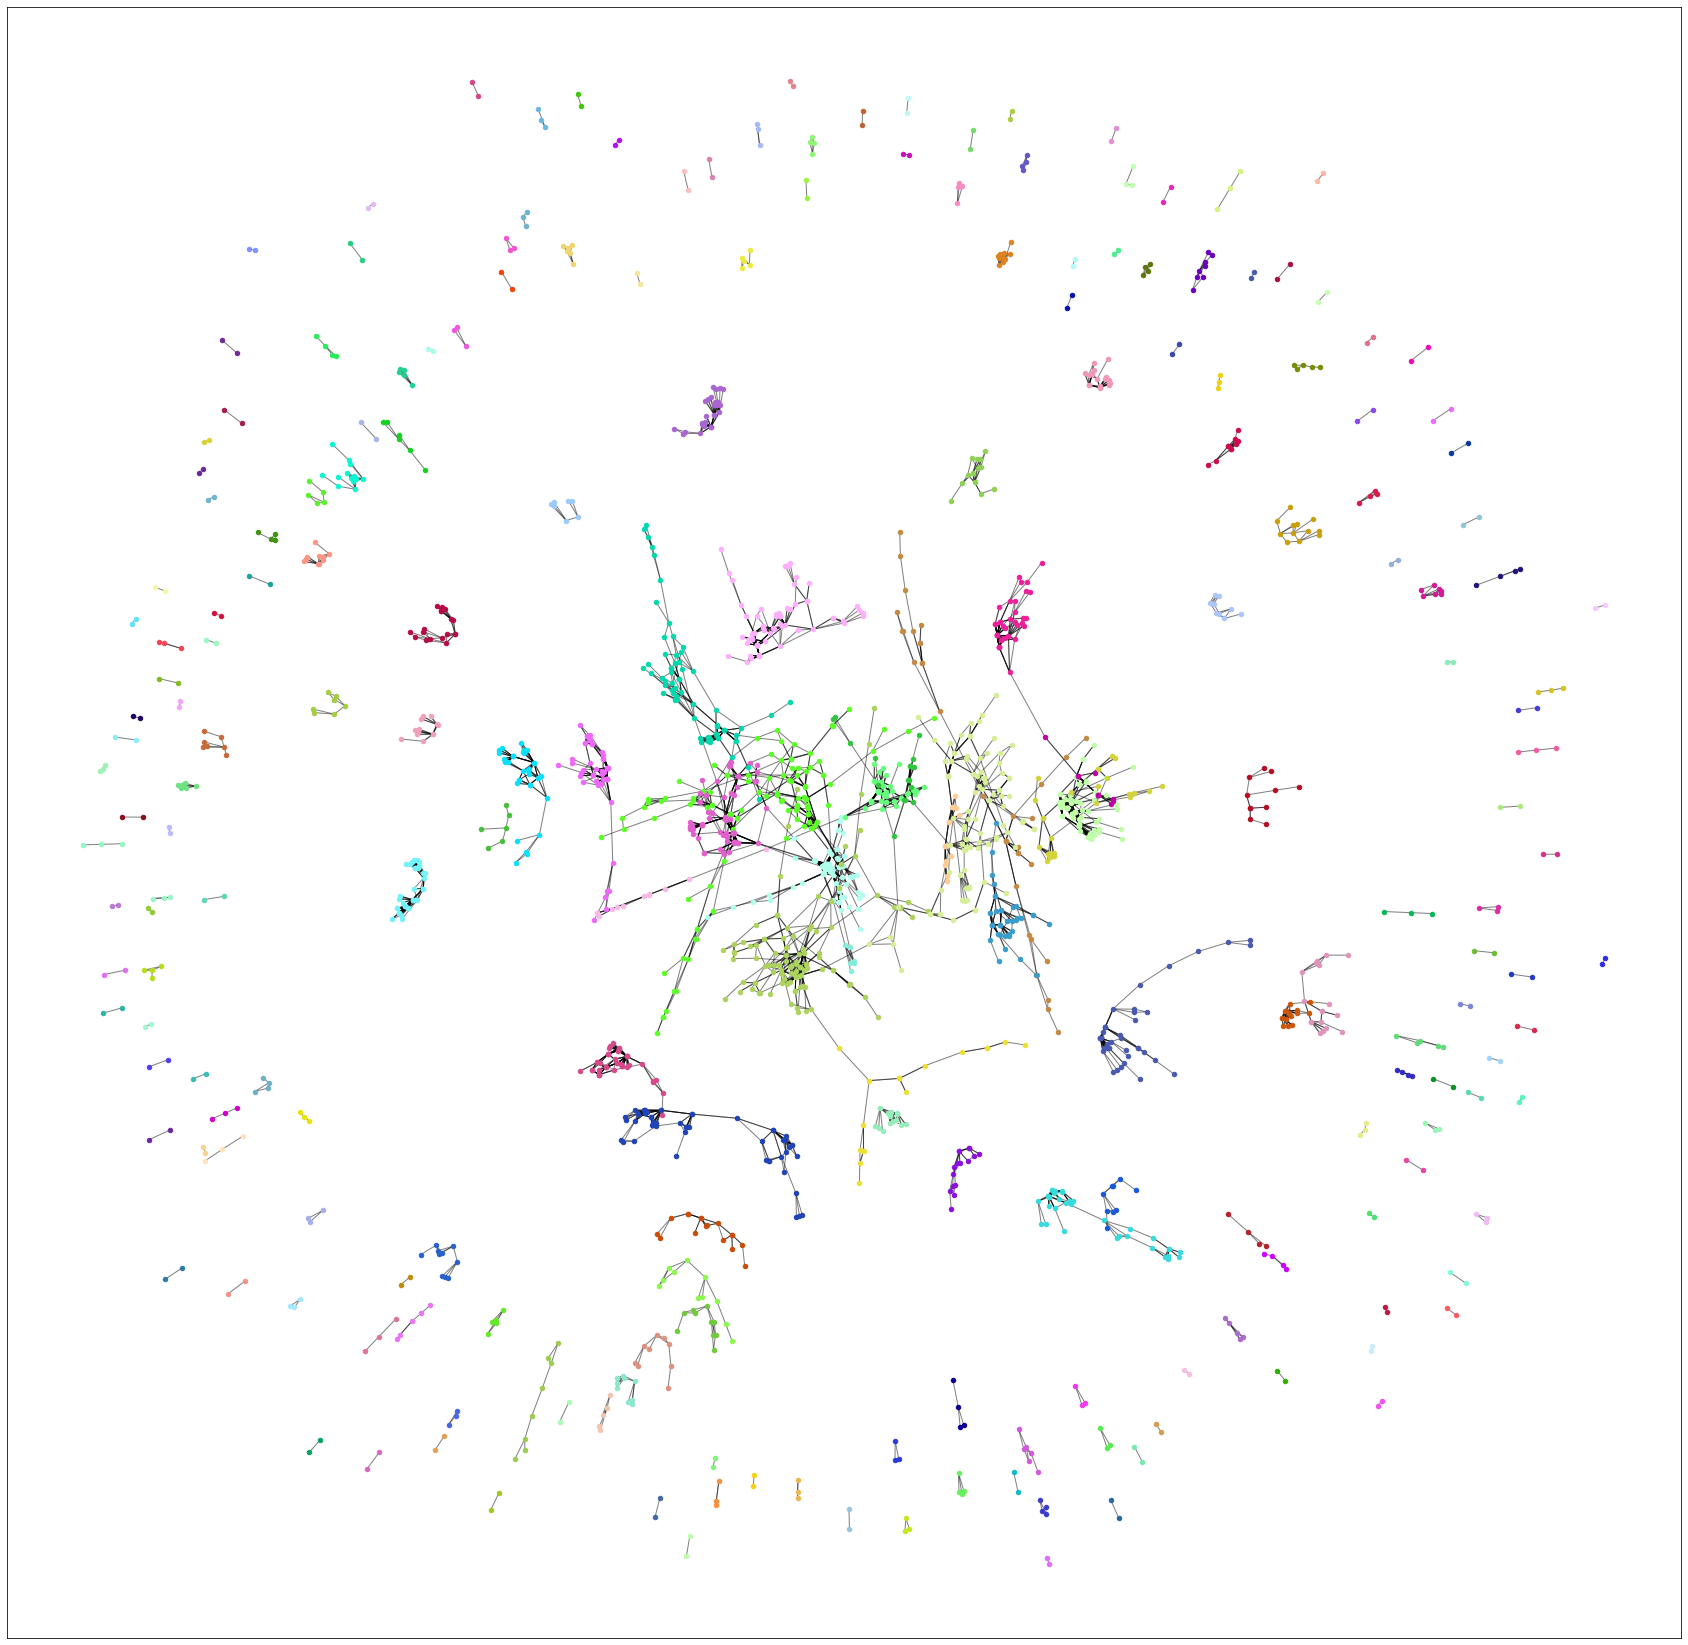

In [40]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [41]:
## Code to change color in json
color_dictionary


{'island': '#11bf38',
 '0': '#c3e136',
 '4': '#9c973c',
 '92': '#931d2e',
 '39': '#4d8cf9',
 '8': '#3140e1',
 '110': '#581524',
 '185': '#ae2cc4',
 '9': '#068dc5',
 '216': '#e3e686',
 '5': '#730f62',
 '108': '#268db6',
 '43': '#98c7cd',
 '79': '#3a0c6a',
 '117': '#b48841',
 '11': '#a6c0b9',
 '2': '#84797e',
 '41': '#9e8b75',
 '95': '#2ad5c7',
 '78': '#0818c2',
 '16': '#a9818b',
 '109': '#e7e9b5',
 '10': '#e6209a',
 '63': '#7fadd7',
 '119': '#cfcb09',
 '26': '#2a8e7b',
 '172': '#56c2e5',
 '87': '#50f3b8',
 '27': '#3d39c6',
 '13': '#4e2ba4',
 '45': '#0f2031',
 '135': '#92d877',
 '57': '#0bf932',
 '69': '#c7b611',
 '203': '#4a7a10',
 '22': '#c4b0a9',
 '1': '#91219c',
 '161': '#f48a27',
 '31': '#8b4e3b',
 '90': '#c98608',
 '131': '#7857e0',
 '83': '#2fb154',
 '163': '#75ad58',
 '35': '#271246',
 '213': '#731070',
 '66': '#c8cc64',
 '38': '#5e71ae',
 '173': '#a6d454',
 '155': '#dc7655',
 '98': '#4a26ff',
 '52': '#c1544d',
 '29': '#5da926',
 '124': '#d2b3a8',
 '46': '#387530',
 '89': '#9c3bb

In [115]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [116]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [117]:
import pandas as pd

In [118]:
signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../signdata-07-08-2020.csv'

In [ ]:
signs_latest_csv['Iconicity(Z)'].max()